# **PREPARATION**

In [27]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# **EXPLORATORY DATA ANALYSIS**

In [8]:
# Import the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Analysis/Collected Datasets/weather_classification_data.csv')
dataset.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [9]:
# Get the dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
# Show and remove the duplicates
print("Amount of the duplicates :", dataset.duplicated().sum())
dataset = dataset.drop_duplicates()

Amount of the duplicates : 0


In [11]:
# Describe the dataset
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


## **Data Distribution**

<Axes: xlabel='Temperature', ylabel='Count'>

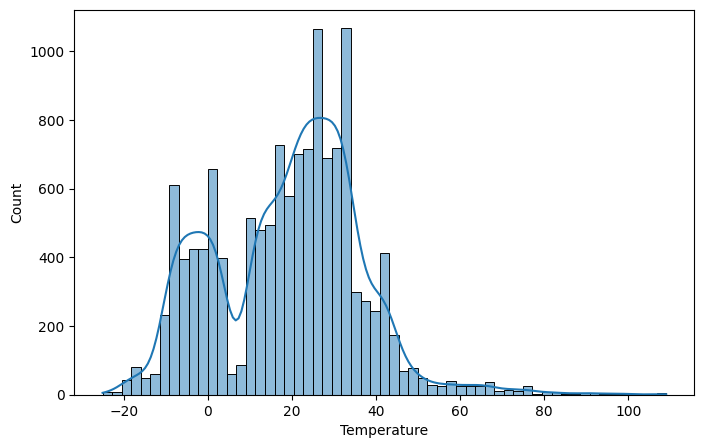

In [12]:
# Show the histogram of the 'Temperature' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Temperature'], kde=True)

<Axes: xlabel='Humidity', ylabel='Count'>

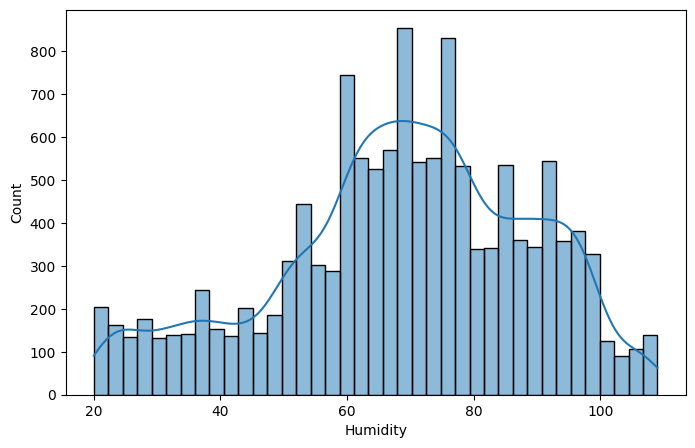

In [13]:
# Show the histogram of the 'Humidity' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Humidity'], kde=True)

<Axes: xlabel='Wind Speed', ylabel='Count'>

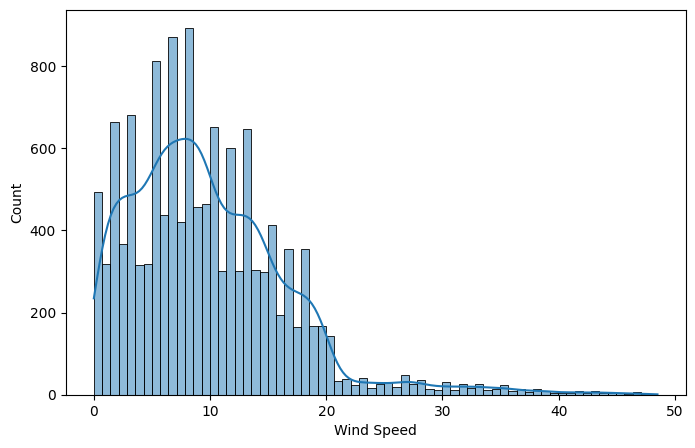

In [14]:
# Show the histogram of the 'Wind Speed' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Wind Speed'], kde=True)

<Axes: xlabel='Precipitation (%)', ylabel='Count'>

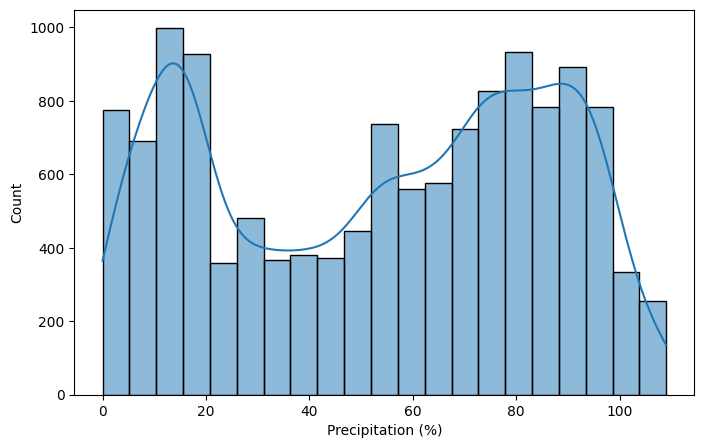

In [15]:
# Show the histogram of the 'Precipitation (%)' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Precipitation (%)'], kde=True)

<Axes: xlabel='Cloud Cover', ylabel='count'>

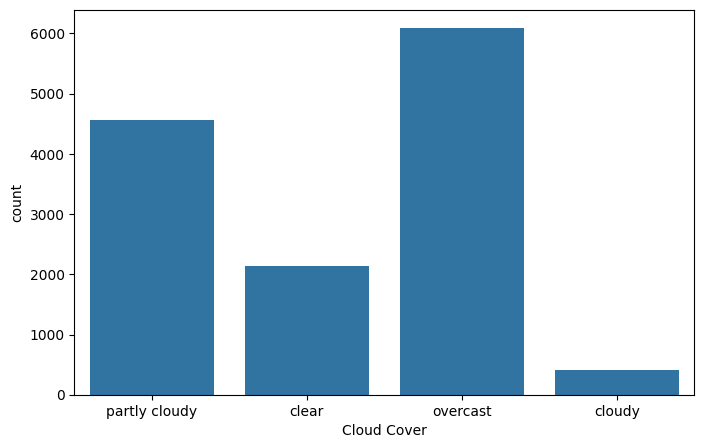

In [16]:
# Show the bar chart of each 'Cloud Cover' categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Cloud Cover', data=dataset)

<Axes: xlabel='Atmospheric Pressure', ylabel='Count'>

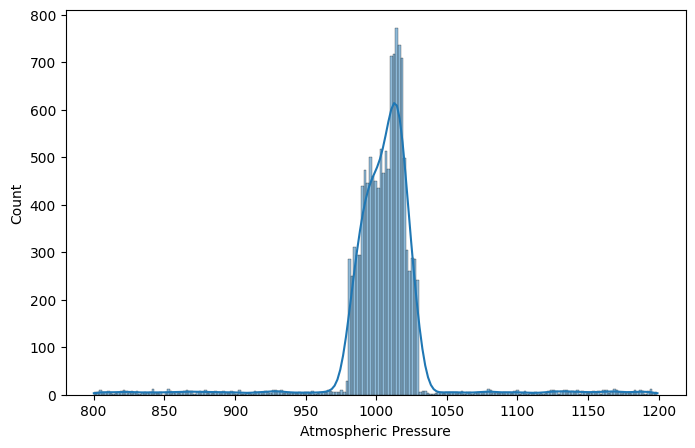

In [17]:
# Show the histogram of the 'Atmospheric Pressure' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Atmospheric Pressure'], kde=True)

<Axes: xlabel='UV Index', ylabel='Count'>

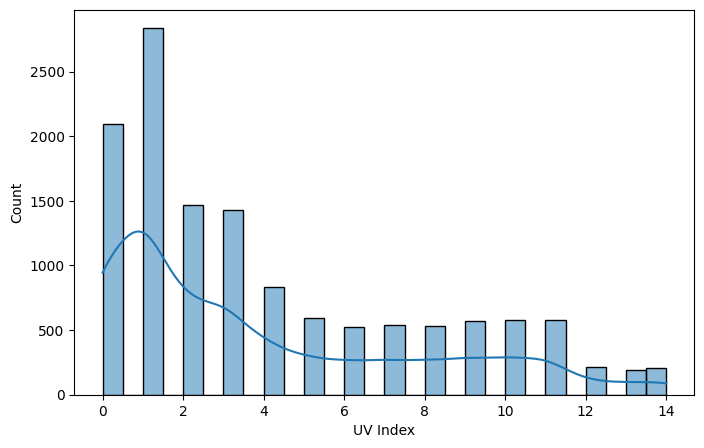

In [18]:
# Show the histogram of the 'UV Index' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['UV Index'], kde=True)

<Axes: xlabel='Season', ylabel='count'>

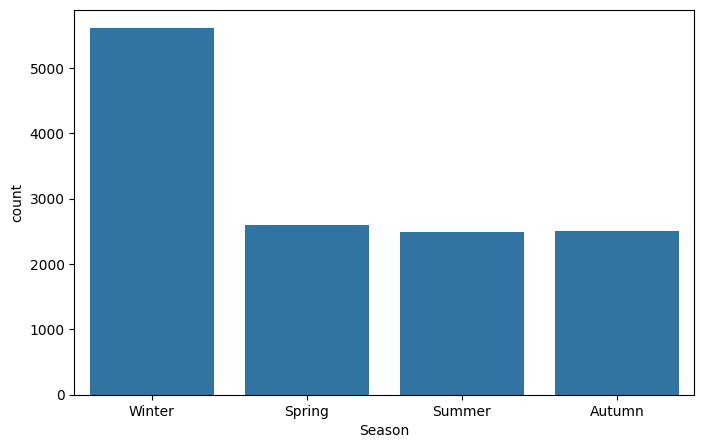

In [19]:
# Show the bar chart of each 'Season' categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Season', data=dataset)

<Axes: xlabel='Visibility (km)', ylabel='Count'>

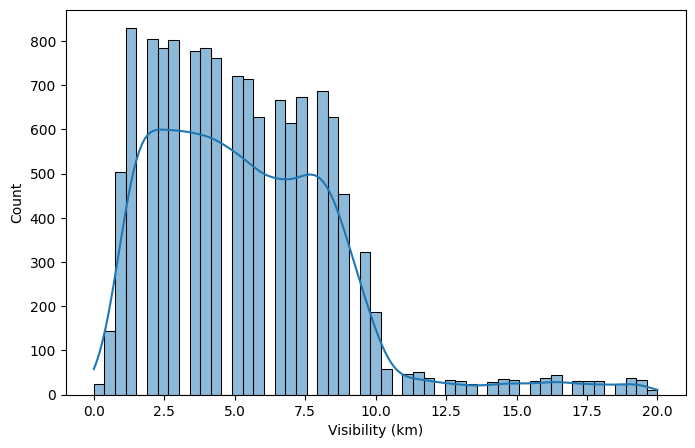

In [20]:
# Show the histogram of the 'Visibility (km)' with distribution line
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Visibility (km)'], kde=True)

<Axes: xlabel='Location', ylabel='count'>

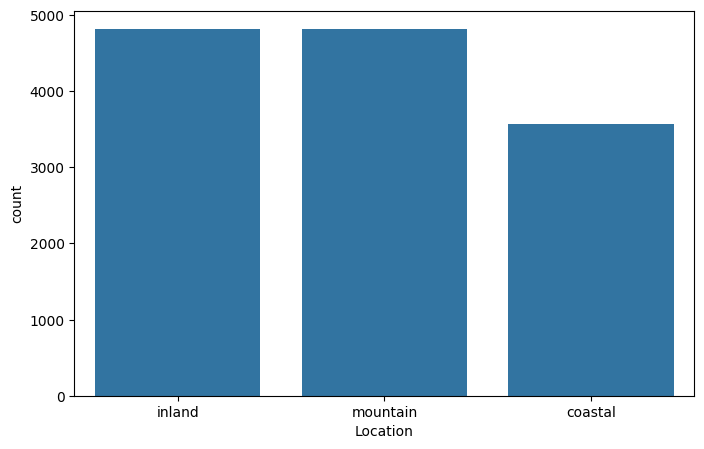

In [21]:
# Show the bar chart of each 'Location' categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Location', data=dataset)

<Axes: xlabel='Weather Type', ylabel='count'>

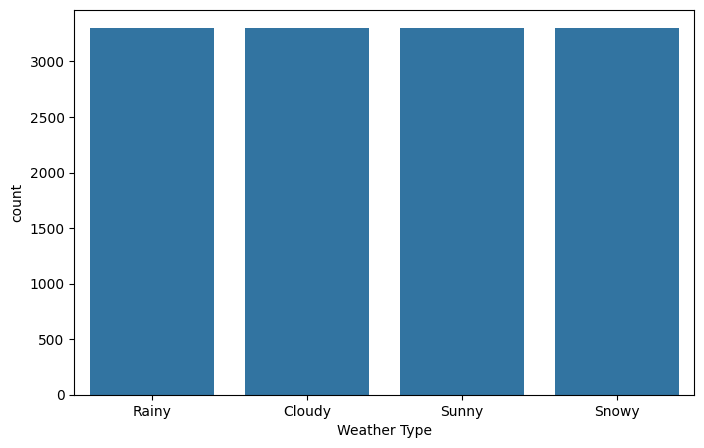

In [22]:
# Show the bar chart of each 'Weather Type' categories
plt.figure(figsize=(8, 5))
sns.countplot(x='Weather Type', data=dataset)

# **DATA PREPROCESSING**

In [23]:
# Separate features and target
X = dataset[['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Season','Visibility (km)','Location']]
y = dataset['Weather Type']

# Define the column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
  transformers=[
    ('num', StandardScaler(), ['Temperature','Humidity','Wind Speed','Precipitation (%)','Atmospheric Pressure','UV Index','Visibility (km)']),
    ('cat', OneHotEncoder(), ['Cloud Cover', 'Season', 'Location'])
  ]
)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# **MODELING**

## **Logistic Regression**

In [ ]:
# Create a pipeline with preprocessing and Logistic Regression classifier
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter to ensure convergence
])

In [ ]:
# Define the parameter grid for GridSearchCV
lr_param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['saga', 'liblinear']  # solvers that support l1 penalty
}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with KFold cross-validation
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=kfold, scoring='accuracy')

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Perform GridSearchCV to find the best parameters
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", lr_grid_search.best_params_)
print("Best cross-validation score: ", lr_grid_search.best_score_)

Best parameters found:  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation score:  0.8709280303030302


In [ ]:
# Use the best estimator to make predictions
lr_best_model = lr_grid_search.best_estimator_
lr_y_pred = lr_best_model.predict(X_test)

# Decode the predictions
lr_y_pred_decoded = label_encoder.inverse_transform(lr_y_pred)
lr_y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print(classification_report(lr_y_test_decoded, lr_y_pred_decoded))

              precision    recall  f1-score   support

      Cloudy       0.82      0.84      0.83       651
       Rainy       0.86      0.84      0.85       647
       Snowy       0.89      0.94      0.91       701
       Sunny       0.92      0.86      0.89       641

    accuracy                           0.87      2640
   macro avg       0.87      0.87      0.87      2640
weighted avg       0.87      0.87      0.87      2640



## **Naive Bayes**

In [ ]:
# Create a pipeline with preprocessing and Naive Bayes classifier
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [ ]:
# Define the parameter grid for GridSearchCV
nb_param_grid = {}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with KFold cross-validation
nb_grid_search = GridSearchCV(nb_pipeline, nb_param_grid, cv=kfold, scoring='accuracy')

# Perform GridSearchCV to find the best parameters
nb_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", nb_grid_search.best_params_)
print("Best cross-validation score: ", nb_grid_search.best_score_)

Best parameters found:  {}
Best cross-validation score:  0.7829545454545455


In [ ]:
# Use the best estimator to make predictions
nb_best_model = nb_grid_search.best_estimator_
nb_y_pred = nb_best_model.predict(X_test)

# Decode the predictions
nb_y_pred_decoded = label_encoder.inverse_transform(nb_y_pred)
nb_y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print(classification_report(nb_y_test_decoded, nb_y_pred_decoded))

              precision    recall  f1-score   support

      Cloudy       0.66      0.81      0.73       651
       Rainy       0.79      0.76      0.78       647
       Snowy       0.82      0.94      0.87       701
       Sunny       1.00      0.64      0.78       641

    accuracy                           0.79      2640
   macro avg       0.82      0.79      0.79      2640
weighted avg       0.82      0.79      0.79      2640



## **Decision Tree**

In [ ]:
# Create a pipeline with preprocessing and Decision Tree classifier
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [ ]:
# Define the parameter grid for GridSearchCV
dt_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with KFold cross-validation
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=kfold, scoring='accuracy')

# Perform GridSearchCV to find the best parameters
dt_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", dt_grid_search.best_params_)
print("Best cross-validation score: ", dt_grid_search.best_score_)

Best parameters found:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best cross-validation score:  0.9110795454545455


In [ ]:
# Use the best estimator to make predictions
dt_best_model = dt_grid_search.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)

# Decode the predictions
dt_y_pred_decoded = label_encoder.inverse_transform(dt_y_pred)
dt_y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print(classification_report(dt_y_test_decoded, dt_y_pred_decoded))

              precision    recall  f1-score   support

      Cloudy       0.88      0.90      0.89       651
       Rainy       0.90      0.89      0.90       647
       Snowy       0.93      0.94      0.93       701
       Sunny       0.93      0.90      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



## **KNearest Neighbors**

In [ ]:
# Create a pipeline with preprocessing and KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [ ]:
# Define the parameter grid for GridSearchCV
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with KFold cross-validation
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=kfold, scoring='accuracy')

# Perform GridSearchCV to find the best parameters
knn_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", knn_grid_search.best_params_)
print("Best cross-validation score: ", knn_grid_search.best_score_)

Best parameters found:  {'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Best cross-validation score:  0.8953598484848484


In [ ]:
# Use the best estimator to make predictions
knn_best_model = knn_grid_search.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)

# Decode the predictions
knn_y_pred_decoded = label_encoder.inverse_transform(knn_y_pred)
knn_y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print(classification_report(knn_y_test_decoded, knn_y_pred_decoded))

              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       651
       Rainy       0.86      0.90      0.88       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.94      0.88      0.91       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



## **Support Vector Machine**

In [ ]:
# Create a pipeline with preprocessing and SVM classifier
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [ ]:
# Define the parameter grid for GridSearchCV
svc_param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with KFold cross-validation
svc_grid_search = GridSearchCV(svc_pipeline, svc_param_grid, cv=kfold, scoring='accuracy')

# Perform GridSearchCV to find the best parameters
svc_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", svc_grid_search.best_params_)
print("Best cross-validation score: ", svc_grid_search.best_score_)

Best parameters found:  {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}
Best cross-validation score:  0.9101325757575758


In [ ]:
# Use the best estimator to make predictions
svc_best_model = svc_grid_search.best_estimator_
svc_y_pred = svc_best_model.predict(X_test)

# Decode the predictions
svc_y_pred_decoded = label_encoder.inverse_transform(svc_y_pred)
svc_y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print(classification_report(svc_y_test_decoded, svc_y_pred_decoded))

              precision    recall  f1-score   support

      Cloudy       0.85      0.89      0.87       651
       Rainy       0.88      0.90      0.89       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.93      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



## **Random Forest**

In [ ]:
# Create a pipeline with preprocessing and Random Forest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [186]:
# Define the parameter grid for GridSearchCV
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__bootstrap': [True, False]
}

# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with KFold cross-validation
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=kfold, scoring='accuracy')

# Perform GridSearchCV to find the best parameters
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", rf_grid_search.best_params_)
print("Best cross-validation score: ", rf_grid_search.best_score_)

Best parameters found:  {'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best cross-validation score:  0.9192234848484848


In [187]:
# Use the best estimator to make predictions
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

# Decode the predictions
rf_y_pred_decoded = label_encoder.inverse_transform(rf_y_pred)
rf_y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluate the classifier's performance
print(classification_report(rf_y_test_decoded, rf_y_pred_decoded))

              precision    recall  f1-score   support

      Cloudy       0.86      0.91      0.89       651
       Rainy       0.91      0.91      0.91       647
       Snowy       0.94      0.94      0.94       701
       Sunny       0.95      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.92      0.91      0.91      2640
weighted avg       0.92      0.91      0.91      2640

